In [2]:
#In this dataset, I dissected a large group of movies and searched for the factors that resulted in profitability (defined as
#Box Office Gross / Budget). Before creating linear regression models to try to predict profitability of new movies that would 
#be release, I analyzed the effect that different variables had on the overall profitability of movies. These variables include:

# Number of famous actors (defined from a mass polling site with > 1 million votes)
# Celebrity of famous directors (defined from a mass polling site with > 300k votes)
# Timing of movie release (e.g. Seasonality)
# Length of movie (runtime)

#Some interesting trends that became apparent right off the bat: 

# More movies appear to be unsuccessful than successful
# Famous actors do indeed bolster the odds of making a successful movie
# Famous directors, as well - though it doesn't seem to be significant just how famous exactly
# While movies in the fall post bigger revenues, movies in the summer are actually the more profitable ones
# Shorter movies tend to slightly outcompete longer ones
# Movies with an IMDB rating between 7 and 8 tend to do the best, even compared with those with a 9 rating




#Read on for the resulting visualizations and conclusions.



In [3]:
# The linear regression model was initially trained with these variables, as well as: 

# Genre of movie (represented as a series of dummy variables)
# Censorship rating of movie (represented as a series of dummy variables) 



# To make a post-release model of movies, I trained an additional model with the extra variables: 

# Rating on imdb ('imdb_rating')
# * Awards won ('Oscars')

In [4]:
#Import everything#
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np


In [5]:
#Bring in the Movies#
movies = pd.read_csv("C:/Movies/Raw Movie Data.csv")

In [6]:

movies.head()

,imdbid,title,plot,rating,imdb_rating,metacritic,dvd_release,production,actors,imdb_votes,poster,director,release_date,runtime,genre,awards,keywords,Budget,Box Office Gross
0,tt0010323,The Cabinet of Dr. Caligari,"Hypnotist Dr. Caligari uses a somnambulist, Ce...",UNRATED,8.1,NaN,15-Oct-97,Rialto Pictures,"Werner Krauss, Conrad Veidt, Friedrich Feher, ...","42,583",https://images-na.ssl-images-amazon.com/images...,Robert Wiene,19-Mar-21,67 min,"Fantasy, Horror, Mystery",1 nomination.,expressionism|somnambulist|avant-garde|hypnosi...,18000,NaN
1,tt0052893,Hiroshima Mon Amour,A French actress filming an anti-war film in H...,NOT RATED,8.0,NaN,24-Jun-03,Rialto Pictures,"Emmanuelle Riva, Eiji Okada, Stella Dassas, Pi...","21,154",https://images-na.ssl-images-amazon.com/images...,Alain Resnais,16-May-60,90 min,"Drama, Romance",Nominated for 1 Oscar. Another 6 wins & 5 nomi...,memory|atomic-bomb|lovers-separation|impossibl...,88300,NaN
2,tt0058898,Alphaville,A U.S. secret agent is sent to the distant spa...,NOT RATED,7.2,NaN,20-Oct-98,Rialto Pictures,"Eddie Constantine, Anna Karina, Akim Tamiroff","17,801",https://images-na.ssl-images-amazon.com/images...,Jean-Luc Godard,5-May-65,99 min,"Drama, Mystery, Sci-Fi",1 win.,dystopia|french-new-wave|satire|comic-violence...,220000,46585
3,tt0074252,"Ugly, Dirty and Bad",Four generations of a family live crowded toge...,NaN,7.9,NaN,1-Nov-16,Compagnia Cinematografica Champion,"Nino Manfredi, Maria Luisa Santella, Francesco...","5,705",https://images-na.ssl-images-amazon.com/images...,Ettore Scola,23-Sep-76,115 min,"Comedy, Drama",1 win & 2 nominations.,incest|failed-murder-attempt|poisoned-food|bap...,6590,NaN
4,tt0084269,Losing Ground,A comedy-drama about a Black American female p...,NaN,6.3,NaN,NaN,Milestone Film & Video,"Billie Allen, Gary Bolling, Clarence Branch Jr...",132,https://images-na.ssl-images-amazon.com/images...,Kathleen Collins,1-Jun-82,86 min,"Comedy, Drama",NaN,artist|painter|marriage|black-independent-film...,NaN,NaN


In [7]:
#Set Index
movies = movies.set_index('title')
movies.head()

,imdbid,plot,rating,imdb_rating,metacritic,dvd_release,production,actors,imdb_votes,poster,director,release_date,runtime,genre,awards,keywords,Budget,Box Office Gross
title,,,,,,,,,,,,,,,,,,
The Cabinet of Dr. Caligari,tt0010323,"Hypnotist Dr. Caligari uses a somnambulist, Ce...",UNRATED,8.1,NaN,15-Oct-97,Rialto Pictures,"Werner Krauss, Conrad Veidt, Friedrich Feher, ...","42,583",https://images-na.ssl-images-amazon.com/images...,Robert Wiene,19-Mar-21,67 min,"Fantasy, Horror, Mystery",1 nomination.,expressionism|somnambulist|avant-garde|hypnosi...,18000,NaN
Hiroshima Mon Amour,tt0052893,A French actress filming an anti-war film in H...,NOT RATED,8.0,NaN,24-Jun-03,Rialto Pictures,"Emmanuelle Riva, Eiji Okada, Stella Dassas, Pi...","21,154",https://images-na.ssl-images-amazon.com/images...,Alain Resnais,16-May-60,90 min,"Drama, Romance",Nominated for 1 Oscar. Another 6 wins & 5 nomi...,memory|atomic-bomb|lovers-separation|impossibl...,88300,NaN
Alphaville,tt0058898,A U.S. secret agent is sent to the distant spa...,NOT RATED,7.2,NaN,20-Oct-98,Rialto Pictures,"Eddie Constantine, Anna Karina, Akim Tamiroff","17,801",https://images-na.ssl-images-amazon.com/images...,Jean-Luc Godard,5-May-65,99 min,"Drama, Mystery, Sci-Fi",1 win.,dystopia|french-new-wave|satire|comic-violence...,220000,46585
"Ugly, Dirty and Bad",tt0074252,Four generations of a family live crowded toge...,NaN,7.9,NaN,1-Nov-16,Compagnia Cinematografica Champion,"Nino Manfredi, Maria Luisa Santella, Francesco...","5,705",https://images-na.ssl-images-amazon.com/images...,Ettore Scola,23-Sep-76,115 min,"Comedy, Drama",1 win & 2 nominations.,incest|failed-murder-attempt|poisoned-food|bap...,6590,NaN
Losing Ground,tt0084269,A comedy-drama about a Black American female p...,NaN,6.3,NaN,NaN,Milestone Film & Video,"Billie Allen, Gary Bolling, Clarence Branch Jr...",132,https://images-na.ssl-images-amazon.com/images...,Kathleen Collins,1-Jun-82,86 min,"Comedy, Drama",NaN,artist|painter|marriage|black-independent-film...,NaN,NaN


In [8]:
#Drop Extra Columns
movies_short = movies.drop(['production', 'metacritic', 'dvd_release', 'imdbid', 'poster', 'keywords', 'imdb_votes'], axis=1)


In [9]:
movies_short.head()

,plot,rating,imdb_rating,actors,director,release_date,runtime,genre,awards,Budget,Box Office Gross
title,,,,,,,,,,,
The Cabinet of Dr. Caligari,"Hypnotist Dr. Caligari uses a somnambulist, Ce...",UNRATED,8.1,"Werner Krauss, Conrad Veidt, Friedrich Feher, ...",Robert Wiene,19-Mar-21,67 min,"Fantasy, Horror, Mystery",1 nomination.,18000,NaN
Hiroshima Mon Amour,A French actress filming an anti-war film in H...,NOT RATED,8.0,"Emmanuelle Riva, Eiji Okada, Stella Dassas, Pi...",Alain Resnais,16-May-60,90 min,"Drama, Romance",Nominated for 1 Oscar. Another 6 wins & 5 nomi...,88300,NaN
Alphaville,A U.S. secret agent is sent to the distant spa...,NOT RATED,7.2,"Eddie Constantine, Anna Karina, Akim Tamiroff",Jean-Luc Godard,5-May-65,99 min,"Drama, Mystery, Sci-Fi",1 win.,220000,46585
"Ugly, Dirty and Bad",Four generations of a family live crowded toge...,NaN,7.9,"Nino Manfredi, Maria Luisa Santella, Francesco...",Ettore Scola,23-Sep-76,115 min,"Comedy, Drama",1 win & 2 nominations.,6590,NaN
Losing Ground,A comedy-drama about a Black American female p...,NaN,6.3,"Billie Allen, Gary Bolling, Clarence Branch Jr...",Kathleen Collins,1-Jun-82,86 min,"Comedy, Drama",NaN,NaN,NaN


In [10]:
movies_short.head()

,plot,rating,imdb_rating,actors,director,release_date,runtime,genre,awards,Budget,Box Office Gross
title,,,,,,,,,,,
The Cabinet of Dr. Caligari,"Hypnotist Dr. Caligari uses a somnambulist, Ce...",UNRATED,8.1,"Werner Krauss, Conrad Veidt, Friedrich Feher, ...",Robert Wiene,19-Mar-21,67 min,"Fantasy, Horror, Mystery",1 nomination.,18000,NaN
Hiroshima Mon Amour,A French actress filming an anti-war film in H...,NOT RATED,8.0,"Emmanuelle Riva, Eiji Okada, Stella Dassas, Pi...",Alain Resnais,16-May-60,90 min,"Drama, Romance",Nominated for 1 Oscar. Another 6 wins & 5 nomi...,88300,NaN
Alphaville,A U.S. secret agent is sent to the distant spa...,NOT RATED,7.2,"Eddie Constantine, Anna Karina, Akim Tamiroff",Jean-Luc Godard,5-May-65,99 min,"Drama, Mystery, Sci-Fi",1 win.,220000,46585
"Ugly, Dirty and Bad",Four generations of a family live crowded toge...,NaN,7.9,"Nino Manfredi, Maria Luisa Santella, Francesco...",Ettore Scola,23-Sep-76,115 min,"Comedy, Drama",1 win & 2 nominations.,6590,NaN
Losing Ground,A comedy-drama about a Black American female p...,NaN,6.3,"Billie Allen, Gary Bolling, Clarence Branch Jr...",Kathleen Collins,1-Jun-82,86 min,"Comedy, Drama",NaN,NaN,NaN


In [11]:
#Drop rows without Money info, and drop "plot"
movies_short = movies_short[pd.notnull(movies_short['Box Office Gross'])]
movies_short = movies_short[pd.notnull(movies_short['Budget'])]
movies_short = movies_short.drop('plot', axis=1)
movies_short.head()

,rating,imdb_rating,actors,director,release_date,runtime,genre,awards,Budget,Box Office Gross
title,,,,,,,,,,
Alphaville,NOT RATED,7.2,"Eddie Constantine, Anna Karina, Akim Tamiroff",Jean-Luc Godard,5-May-65,99 min,"Drama, Mystery, Sci-Fi",1 win.,220000,46585
Ghostbusters,PG,7.8,"Bill Murray, Dan Aykroyd, Sigourney Weaver, Ha...",Ivan Reitman,8-Jun-84,105 min,"Action, Adventure, Comedy",Nominated for 2 Oscars. Another 6 wins & 6 nom...,30000000,238632124
Beauty and the Beast,G,8.0,"Robby Benson, Jesse Corti, Rex Everhart, Angel...","Gary Trousdale, Kirk Wise",22-Nov-91,84 min,"Animation, Family, Fantasy",Won 2 Oscars. Another 23 wins & 22 nominations.,25000000,218967620
Jurassic Park,PG-13,8.1,"Sam Neill, Laura Dern, Jeff Goldblum, Richard ...",Steven Spielberg,11-Jun-93,127 min,"Adventure, Sci-Fi, Thriller",Won 3 Oscars. Another 28 wins & 17 nominations.,63000000,402453882
Forrest Gump,PG-13,8.8,"Tom Hanks, Rebecca Williams, Sally Field, Mich...",Robert Zemeckis,6-Jul-94,142 min,"Comedy, Drama, Romance",Won 6 Oscars. Another 39 wins & 66 nominations.,55000000,330252182


In [12]:
movies_short.head()
#movies_short.keys()
#print(movies_short.iloc[0, 0])

,rating,imdb_rating,actors,director,release_date,runtime,genre,awards,Budget,Box Office Gross
title,,,,,,,,,,
Alphaville,NOT RATED,7.2,"Eddie Constantine, Anna Karina, Akim Tamiroff",Jean-Luc Godard,5-May-65,99 min,"Drama, Mystery, Sci-Fi",1 win.,220000,46585
Ghostbusters,PG,7.8,"Bill Murray, Dan Aykroyd, Sigourney Weaver, Ha...",Ivan Reitman,8-Jun-84,105 min,"Action, Adventure, Comedy",Nominated for 2 Oscars. Another 6 wins & 6 nom...,30000000,238632124
Beauty and the Beast,G,8.0,"Robby Benson, Jesse Corti, Rex Everhart, Angel...","Gary Trousdale, Kirk Wise",22-Nov-91,84 min,"Animation, Family, Fantasy",Won 2 Oscars. Another 23 wins & 22 nominations.,25000000,218967620
Jurassic Park,PG-13,8.1,"Sam Neill, Laura Dern, Jeff Goldblum, Richard ...",Steven Spielberg,11-Jun-93,127 min,"Adventure, Sci-Fi, Thriller",Won 3 Oscars. Another 28 wins & 17 nominations.,63000000,402453882
Forrest Gump,PG-13,8.8,"Tom Hanks, Rebecca Williams, Sally Field, Mich...",Robert Zemeckis,6-Jul-94,142 min,"Comedy, Drama, Romance",Won 6 Oscars. Another 39 wins & 66 nominations.,55000000,330252182


In [13]:
#Remove gunk from Box Office and Budget Columns
# 'fake' is just a placeholder because I couldn't figure out what to do for an empty "if:" section here
fake = 0
idx = 0 
for gross in movies_short['Box Office Gross'] : 
    
    if gross.isdigit() :
        fake += 1
    else :
        movies_short.iloc[idx, 9] = np.nan   
    idx += 1

movies_short.head()

,rating,imdb_rating,actors,director,release_date,runtime,genre,awards,Budget,Box Office Gross
title,,,,,,,,,,
Alphaville,NOT RATED,7.2,"Eddie Constantine, Anna Karina, Akim Tamiroff",Jean-Luc Godard,5-May-65,99 min,"Drama, Mystery, Sci-Fi",1 win.,220000,46585
Ghostbusters,PG,7.8,"Bill Murray, Dan Aykroyd, Sigourney Weaver, Ha...",Ivan Reitman,8-Jun-84,105 min,"Action, Adventure, Comedy",Nominated for 2 Oscars. Another 6 wins & 6 nom...,30000000,238632124
Beauty and the Beast,G,8.0,"Robby Benson, Jesse Corti, Rex Everhart, Angel...","Gary Trousdale, Kirk Wise",22-Nov-91,84 min,"Animation, Family, Fantasy",Won 2 Oscars. Another 23 wins & 22 nominations.,25000000,218967620
Jurassic Park,PG-13,8.1,"Sam Neill, Laura Dern, Jeff Goldblum, Richard ...",Steven Spielberg,11-Jun-93,127 min,"Adventure, Sci-Fi, Thriller",Won 3 Oscars. Another 28 wins & 17 nominations.,63000000,402453882
Forrest Gump,PG-13,8.8,"Tom Hanks, Rebecca Williams, Sally Field, Mich...",Robert Zemeckis,6-Jul-94,142 min,"Comedy, Drama, Romance",Won 6 Oscars. Another 39 wins & 66 nominations.,55000000,330252182


In [14]:
idx = 0 
for movies in movies_short['Budget'] : 
    
    if gross.isdigit() :
        fake += 1
    else :
        movies_short.iloc[idx, 8] = np.nan   
    idx += 1
    
print(fake)
movies_short.head()

5253


,rating,imdb_rating,actors,director,release_date,runtime,genre,awards,Budget,Box Office Gross
title,,,,,,,,,,
Alphaville,NOT RATED,7.2,"Eddie Constantine, Anna Karina, Akim Tamiroff",Jean-Luc Godard,5-May-65,99 min,"Drama, Mystery, Sci-Fi",1 win.,220000,46585
Ghostbusters,PG,7.8,"Bill Murray, Dan Aykroyd, Sigourney Weaver, Ha...",Ivan Reitman,8-Jun-84,105 min,"Action, Adventure, Comedy",Nominated for 2 Oscars. Another 6 wins & 6 nom...,30000000,238632124
Beauty and the Beast,G,8.0,"Robby Benson, Jesse Corti, Rex Everhart, Angel...","Gary Trousdale, Kirk Wise",22-Nov-91,84 min,"Animation, Family, Fantasy",Won 2 Oscars. Another 23 wins & 22 nominations.,25000000,218967620
Jurassic Park,PG-13,8.1,"Sam Neill, Laura Dern, Jeff Goldblum, Richard ...",Steven Spielberg,11-Jun-93,127 min,"Adventure, Sci-Fi, Thriller",Won 3 Oscars. Another 28 wins & 17 nominations.,63000000,402453882
Forrest Gump,PG-13,8.8,"Tom Hanks, Rebecca Williams, Sally Field, Mich...",Robert Zemeckis,6-Jul-94,142 min,"Comedy, Drama, Romance",Won 6 Oscars. Another 39 wins & 66 nominations.,55000000,330252182


In [15]:
#Make column for profitability Ratio and Define It - Second attempt (Successful)


movies_short['Profitability Ratio'] = 0 

idx = 0 
for movies in movies_short['Profitability Ratio'] : 
    movies_short.iloc[idx, 10] = float(movies_short.iloc[idx, 9]) / float(movies_short.iloc[idx, 8])
   
    idx += 1
    
movies_short.head()    

,rating,imdb_rating,actors,director,release_date,runtime,genre,awards,Budget,Box Office Gross,Profitability Ratio
title,,,,,,,,,,,
Alphaville,NOT RATED,7.2,"Eddie Constantine, Anna Karina, Akim Tamiroff",Jean-Luc Godard,5-May-65,99 min,"Drama, Mystery, Sci-Fi",1 win.,220000,46585,0.211750
Ghostbusters,PG,7.8,"Bill Murray, Dan Aykroyd, Sigourney Weaver, Ha...",Ivan Reitman,8-Jun-84,105 min,"Action, Adventure, Comedy",Nominated for 2 Oscars. Another 6 wins & 6 nom...,30000000,238632124,7.954404
Beauty and the Beast,G,8.0,"Robby Benson, Jesse Corti, Rex Everhart, Angel...","Gary Trousdale, Kirk Wise",22-Nov-91,84 min,"Animation, Family, Fantasy",Won 2 Oscars. Another 23 wins & 22 nominations.,25000000,218967620,8.758705
Jurassic Park,PG-13,8.1,"Sam Neill, Laura Dern, Jeff Goldblum, Richard ...",Steven Spielberg,11-Jun-93,127 min,"Adventure, Sci-Fi, Thriller",Won 3 Oscars. Another 28 wins & 17 nominations.,63000000,402453882,6.388157
Forrest Gump,PG-13,8.8,"Tom Hanks, Rebecca Williams, Sally Field, Mich...",Robert Zemeckis,6-Jul-94,142 min,"Comedy, Drama, Romance",Won 6 Oscars. Another 39 wins & 66 nominations.,55000000,330252182,6.004585


In [16]:
#Upload Famous Actors and Make a column

famous_actors = pd.read_csv("C:/Movies/Greatest Actors List.csv")
#df = df[np.isfinite(df['EPS'])]


In [17]:
movies_short['actor_score'] = 0

pos = -1
for actors in movies_short['actors'] :
    actors = str(actors).split(',')
    pos += 1
    
    for actor in actors :
        actor = actor.strip()
        
        if actor in famous_actors['Name'].tolist() :
           
            movies_short.iloc[pos, 11] += 1 
            

movies_short.head()

,rating,imdb_rating,actors,director,release_date,runtime,genre,awards,Budget,Box Office Gross,Profitability Ratio,actor_score
title,,,,,,,,,,,,
Alphaville,NOT RATED,7.2,"Eddie Constantine, Anna Karina, Akim Tamiroff",Jean-Luc Godard,5-May-65,99 min,"Drama, Mystery, Sci-Fi",1 win.,220000,46585,0.211750,0
Ghostbusters,PG,7.8,"Bill Murray, Dan Aykroyd, Sigourney Weaver, Ha...",Ivan Reitman,8-Jun-84,105 min,"Action, Adventure, Comedy",Nominated for 2 Oscars. Another 6 wins & 6 nom...,30000000,238632124,7.954404,2
Beauty and the Beast,G,8.0,"Robby Benson, Jesse Corti, Rex Everhart, Angel...","Gary Trousdale, Kirk Wise",22-Nov-91,84 min,"Animation, Family, Fantasy",Won 2 Oscars. Another 23 wins & 22 nominations.,25000000,218967620,8.758705,0
Jurassic Park,PG-13,8.1,"Sam Neill, Laura Dern, Jeff Goldblum, Richard ...",Steven Spielberg,11-Jun-93,127 min,"Adventure, Sci-Fi, Thriller",Won 3 Oscars. Another 28 wins & 17 nominations.,63000000,402453882,6.388157,0
Forrest Gump,PG-13,8.8,"Tom Hanks, Rebecca Williams, Sally Field, Mich...",Robert Zemeckis,6-Jul-94,142 min,"Comedy, Drama, Romance",Won 6 Oscars. Another 39 wins & 66 nominations.,55000000,330252182,6.004585,2


In [18]:
#Uploading and prepping the famous directors list

famous_directors = pd.read_csv("C:/Movies/Greatest Directors List.csv")

first_ten = famous_directors['Name'][0:10]
second_ten = famous_directors['Name'][11:20]
third_ten = famous_directors['Name'][21:30]
fourth_ten = famous_directors['Name'][31:40]
fifth_ten = famous_directors['Name'][41:50]

first_ten = first_ten.tolist()
second_ten = second_ten.tolist()
third_ten = third_ten.tolist()
fourth_ten = fourth_ten.tolist()
fifth_ten = fifth_ten.tolist()

In [19]:
movies_short['director_score'] = 0
        
pos = -1
for directors in movies_short['director'] :
    directors = str(directors)
    pos += 1
    
        
    if directors in first_ten :
           
        movies_short.iloc[pos, 12] += 5
    
    if directors in second_ten :
           
        movies_short.iloc[pos, 12] += 4
        
    if directors in third_ten :
           
        movies_short.iloc[pos, 12] += 3
        
    if directors in fourth_ten :
           
        movies_short.iloc[pos, 12] += 2
        
    if directors in fifth_ten :
           
        movies_short.iloc[pos, 12] += 1
        
movies_short.head()

,rating,imdb_rating,actors,director,release_date,runtime,genre,awards,Budget,Box Office Gross,Profitability Ratio,actor_score,director_score
title,,,,,,,,,,,,,
Alphaville,NOT RATED,7.2,"Eddie Constantine, Anna Karina, Akim Tamiroff",Jean-Luc Godard,5-May-65,99 min,"Drama, Mystery, Sci-Fi",1 win.,220000,46585,0.211750,0,0
Ghostbusters,PG,7.8,"Bill Murray, Dan Aykroyd, Sigourney Weaver, Ha...",Ivan Reitman,8-Jun-84,105 min,"Action, Adventure, Comedy",Nominated for 2 Oscars. Another 6 wins & 6 nom...,30000000,238632124,7.954404,2,0
Beauty and the Beast,G,8.0,"Robby Benson, Jesse Corti, Rex Everhart, Angel...","Gary Trousdale, Kirk Wise",22-Nov-91,84 min,"Animation, Family, Fantasy",Won 2 Oscars. Another 23 wins & 22 nominations.,25000000,218967620,8.758705,0,0
Jurassic Park,PG-13,8.1,"Sam Neill, Laura Dern, Jeff Goldblum, Richard ...",Steven Spielberg,11-Jun-93,127 min,"Adventure, Sci-Fi, Thriller",Won 3 Oscars. Another 28 wins & 17 nominations.,63000000,402453882,6.388157,0,3
Forrest Gump,PG-13,8.8,"Tom Hanks, Rebecca Williams, Sally Field, Mich...",Robert Zemeckis,6-Jul-94,142 min,"Comedy, Drama, Romance",Won 6 Oscars. Another 39 wins & 66 nominations.,55000000,330252182,6.004585,2,1


In [20]:
movies_short.head(100)

,rating,imdb_rating,actors,director,release_date,runtime,genre,awards,Budget,Box Office Gross,Profitability Ratio,actor_score,director_score
title,,,,,,,,,,,,,
Alphaville,NOT RATED,7.2,"Eddie Constantine, Anna Karina, Akim Tamiroff",Jean-Luc Godard,5-May-65,99 min,"Drama, Mystery, Sci-Fi",1 win.,220000,46585,0.211750,0,0
Ghostbusters,PG,7.8,"Bill Murray, Dan Aykroyd, Sigourney Weaver, Ha...",Ivan Reitman,8-Jun-84,105 min,"Action, Adventure, Comedy",Nominated for 2 Oscars. Another 6 wins & 6 nom...,30000000,238632124,7.954404,2,0
Beauty and the Beast,G,8.0,"Robby Benson, Jesse Corti, Rex Everhart, Angel...","Gary Trousdale, Kirk Wise",22-Nov-91,84 min,"Animation, Family, Fantasy",Won 2 Oscars. Another 23 wins & 22 nominations.,25000000,218967620,8.758705,0,0
Jurassic Park,PG-13,8.1,"Sam Neill, Laura Dern, Jeff Goldblum, Richard ...",Steven Spielberg,11-Jun-93,127 min,"Adventure, Sci-Fi, Thriller",Won 3 Oscars. Another 28 wins & 17 nominations.,63000000,402453882,6.388157,0,3
Forrest Gump,PG-13,8.8,"Tom Hanks, Rebecca Williams, Sally Field, Mich...",Robert Zemeckis,6-Jul-94,142 min,"Comedy, Drama, Romance",Won 6 Oscars. Another 39 wins & 66 nominations.,55000000,330252182,6.004585,2,1
Titanic,PG-13,7.7,"Leonardo DiCaprio, Kate Winslet, Billy Zane, K...",James Cameron,19-Dec-97,194 min,"Drama, Romance",Won 11 Oscars. Another 110 wins & 74 nominations.,200000000,658672302,3.293362,3,1
Star Wars: Episode I - The Phantom Menace,PG,6.5,"Liam Neeson, Ewan McGregor, Natalie Portman, J...",George Lucas,19-May-99,136 min,"Action, Adventure, Fantasy",Nominated for 3 Oscars. Another 25 wins & 60 n...,115000000,474544677,4.126475,2,1
The Fast and the Furious,PG-13,6.7,"Paul Walker, Vin Diesel, Michelle Rodriguez, J...",Rob Cohen,22-Jun-01,106 min,"Action, Crime, Thriller",10 wins & 12 nominations.,38000000,144533925,3.803524,0,0
The Secret Life of Walter Mitty,PG,7.3,"Ben Stiller, Kristen Wiig, Jon Daly, Kathryn Hahn",Ben Stiller,25-Dec-13,114 min,"Adventure, Comedy, Drama",5 wins & 18 nominations.,90000000,58236838,0.647076,0,0


In [21]:
#Make Genre Columns
movies_short['Action?'] = 0 
movies_short['Adventure?'] = 0
movies_short['Animation?'] = 0 
movies_short['Biography?'] = 0 
movies_short['Comedy?'] = 0 
movies_short['Drama?'] = 0 
movies_short['Family?'] = 0 
movies_short['Fantasy?'] = 0
movies_short['History?'] = 0 
movies_short['Horror?'] = 0 
movies_short['Mystery?'] = 0 
movies_short['Romance?'] = 0 
movies_short['Sci-Fi?'] = 0 
movies_short['Thriller?'] = 0 
movies_short.head()

,rating,imdb_rating,actors,director,release_date,runtime,genre,awards,Budget,Box Office Gross,...,Comedy?,Drama?,Family?,Fantasy?,History?,Horror?,Mystery?,Romance?,Sci-Fi?,Thriller?
title,,,,,,,,,,,,,,,,,,,,,
Alphaville,NOT RATED,7.2,"Eddie Constantine, Anna Karina, Akim Tamiroff",Jean-Luc Godard,5-May-65,99 min,"Drama, Mystery, Sci-Fi",1 win.,220000,46585,...,0,0,0,0,0,0,0,0,0,0
Ghostbusters,PG,7.8,"Bill Murray, Dan Aykroyd, Sigourney Weaver, Ha...",Ivan Reitman,8-Jun-84,105 min,"Action, Adventure, Comedy",Nominated for 2 Oscars. Another 6 wins & 6 nom...,30000000,238632124,...,0,0,0,0,0,0,0,0,0,0
Beauty and the Beast,G,8.0,"Robby Benson, Jesse Corti, Rex Everhart, Angel...","Gary Trousdale, Kirk Wise",22-Nov-91,84 min,"Animation, Family, Fantasy",Won 2 Oscars. Another 23 wins & 22 nominations.,25000000,218967620,...,0,0,0,0,0,0,0,0,0,0
Jurassic Park,PG-13,8.1,"Sam Neill, Laura Dern, Jeff Goldblum, Richard ...",Steven Spielberg,11-Jun-93,127 min,"Adventure, Sci-Fi, Thriller",Won 3 Oscars. Another 28 wins & 17 nominations.,63000000,402453882,...,0,0,0,0,0,0,0,0,0,0
Forrest Gump,PG-13,8.8,"Tom Hanks, Rebecca Williams, Sally Field, Mich...",Robert Zemeckis,6-Jul-94,142 min,"Comedy, Drama, Romance",Won 6 Oscars. Another 39 wins & 66 nominations.,55000000,330252182,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#Assign Genre Column Values
pos = -1
for genres in movies_short['genre'] :
    genres = str(genres).split(',')
    pos += 1
    
    for genre in genres :
        if 'Action' in genre.strip() :
            movies_short.iloc[pos, 13] += 1
            
        if 'Adventure' in genre.strip():
            movies_short.iloc[pos, 14] += 1
            
        if 'Animation' in genre.strip():
            movies_short.iloc[pos, 15] += 1
            
        if 'Biography' in genre.strip():
            movies_short.iloc[pos, 16] += 1
            
        if 'Comedy' in genre.strip():
            movies_short.iloc[pos, 17] += 1
            
        if 'Drama' in genre.strip():
            movies_short.iloc[pos, 18] += 1
            
        if 'Family' in genre.strip():
            movies_short.iloc[pos, 19] += 1
            
        if 'Fantasy' in genre.strip() :
            movies_short.iloc[pos, 20] += 1
            
        if 'History' in genre.strip():
            movies_short.iloc[pos, 21] += 1
            
        if 'Horror' in genre.strip():
            movies_short.iloc[pos, 22] += 1
            
        if 'Mystery' in genre.strip():
            movies_short.iloc[pos, 23] += 1
            
        if 'Romance' in genre.strip():
            movies_short.iloc[pos, 24] += 1
            
        if 'Sci-Fi' in genre.strip():
            movies_short.iloc[pos, 25] += 1
            
        if 'Thriller' in genre.strip() :
            movies_short.iloc[pos, 26] += 1
            
            
movies_short.head()

,rating,imdb_rating,actors,director,release_date,runtime,genre,awards,Budget,Box Office Gross,...,Comedy?,Drama?,Family?,Fantasy?,History?,Horror?,Mystery?,Romance?,Sci-Fi?,Thriller?
title,,,,,,,,,,,,,,,,,,,,,
Alphaville,NOT RATED,7.2,"Eddie Constantine, Anna Karina, Akim Tamiroff",Jean-Luc Godard,5-May-65,99 min,"Drama, Mystery, Sci-Fi",1 win.,220000,46585,...,0,1,0,0,0,0,1,0,1,0
Ghostbusters,PG,7.8,"Bill Murray, Dan Aykroyd, Sigourney Weaver, Ha...",Ivan Reitman,8-Jun-84,105 min,"Action, Adventure, Comedy",Nominated for 2 Oscars. Another 6 wins & 6 nom...,30000000,238632124,...,1,0,0,0,0,0,0,0,0,0
Beauty and the Beast,G,8.0,"Robby Benson, Jesse Corti, Rex Everhart, Angel...","Gary Trousdale, Kirk Wise",22-Nov-91,84 min,"Animation, Family, Fantasy",Won 2 Oscars. Another 23 wins & 22 nominations.,25000000,218967620,...,0,0,1,1,0,0,0,0,0,0
Jurassic Park,PG-13,8.1,"Sam Neill, Laura Dern, Jeff Goldblum, Richard ...",Steven Spielberg,11-Jun-93,127 min,"Adventure, Sci-Fi, Thriller",Won 3 Oscars. Another 28 wins & 17 nominations.,63000000,402453882,...,0,0,0,0,0,0,0,0,1,1
Forrest Gump,PG-13,8.8,"Tom Hanks, Rebecca Williams, Sally Field, Mich...",Robert Zemeckis,6-Jul-94,142 min,"Comedy, Drama, Romance",Won 6 Oscars. Another 39 wins & 66 nominations.,55000000,330252182,...,1,1,0,0,0,0,0,1,0,0


In [23]:
#Make MPAA Rating Columns

movies_short['G?'] = 0 
movies_short['PG?'] = 0
movies_short['PG-13?'] = 0 
movies_short['R?'] = 0 
movies_short['Not Rated?'] = 0 

movies_short.head()

,rating,imdb_rating,actors,director,release_date,runtime,genre,awards,Budget,Box Office Gross,...,Horror?,Mystery?,Romance?,Sci-Fi?,Thriller?,G?,PG?,PG-13?,R?,Not Rated?
title,,,,,,,,,,,,,,,,,,,,,
Alphaville,NOT RATED,7.2,"Eddie Constantine, Anna Karina, Akim Tamiroff",Jean-Luc Godard,5-May-65,99 min,"Drama, Mystery, Sci-Fi",1 win.,220000,46585,...,0,1,0,1,0,0,0,0,0,0
Ghostbusters,PG,7.8,"Bill Murray, Dan Aykroyd, Sigourney Weaver, Ha...",Ivan Reitman,8-Jun-84,105 min,"Action, Adventure, Comedy",Nominated for 2 Oscars. Another 6 wins & 6 nom...,30000000,238632124,...,0,0,0,0,0,0,0,0,0,0
Beauty and the Beast,G,8.0,"Robby Benson, Jesse Corti, Rex Everhart, Angel...","Gary Trousdale, Kirk Wise",22-Nov-91,84 min,"Animation, Family, Fantasy",Won 2 Oscars. Another 23 wins & 22 nominations.,25000000,218967620,...,0,0,0,0,0,0,0,0,0,0
Jurassic Park,PG-13,8.1,"Sam Neill, Laura Dern, Jeff Goldblum, Richard ...",Steven Spielberg,11-Jun-93,127 min,"Adventure, Sci-Fi, Thriller",Won 3 Oscars. Another 28 wins & 17 nominations.,63000000,402453882,...,0,0,0,1,1,0,0,0,0,0
Forrest Gump,PG-13,8.8,"Tom Hanks, Rebecca Williams, Sally Field, Mich...",Robert Zemeckis,6-Jul-94,142 min,"Comedy, Drama, Romance",Won 6 Oscars. Another 39 wins & 66 nominations.,55000000,330252182,...,0,0,1,0,0,0,0,0,0,0


In [24]:
#Assign MPAA Rating Column Values
pos = 0
for ratings in movies_short['rating'] :
    ratings = str(ratings).strip()
    
    if ratings == 'G' :
        movies_short.iloc[pos, 27] += 1
        
    elif ratings == 'PG' :
        movies_short.iloc[pos, 28] += 1
        
    elif ratings == 'PG-13' :
        movies_short.iloc[pos, 29] += 1
        
    elif ratings == 'R' :
        movies_short.iloc[pos, 30] += 1
        
    else :
        movies_short.iloc[pos, 31] += 1
    
    pos += 1
    
    
    

In [25]:
movies_short.head()

,rating,imdb_rating,actors,director,release_date,runtime,genre,awards,Budget,Box Office Gross,...,Horror?,Mystery?,Romance?,Sci-Fi?,Thriller?,G?,PG?,PG-13?,R?,Not Rated?
title,,,,,,,,,,,,,,,,,,,,,
Alphaville,NOT RATED,7.2,"Eddie Constantine, Anna Karina, Akim Tamiroff",Jean-Luc Godard,5-May-65,99 min,"Drama, Mystery, Sci-Fi",1 win.,220000,46585,...,0,1,0,1,0,0,0,0,0,1
Ghostbusters,PG,7.8,"Bill Murray, Dan Aykroyd, Sigourney Weaver, Ha...",Ivan Reitman,8-Jun-84,105 min,"Action, Adventure, Comedy",Nominated for 2 Oscars. Another 6 wins & 6 nom...,30000000,238632124,...,0,0,0,0,0,0,1,0,0,0
Beauty and the Beast,G,8.0,"Robby Benson, Jesse Corti, Rex Everhart, Angel...","Gary Trousdale, Kirk Wise",22-Nov-91,84 min,"Animation, Family, Fantasy",Won 2 Oscars. Another 23 wins & 22 nominations.,25000000,218967620,...,0,0,0,0,0,1,0,0,0,0
Jurassic Park,PG-13,8.1,"Sam Neill, Laura Dern, Jeff Goldblum, Richard ...",Steven Spielberg,11-Jun-93,127 min,"Adventure, Sci-Fi, Thriller",Won 3 Oscars. Another 28 wins & 17 nominations.,63000000,402453882,...,0,0,0,1,1,0,0,1,0,0
Forrest Gump,PG-13,8.8,"Tom Hanks, Rebecca Williams, Sally Field, Mich...",Robert Zemeckis,6-Jul-94,142 min,"Comedy, Drama, Romance",Won 6 Oscars. Another 39 wins & 66 nominations.,55000000,330252182,...,0,0,1,0,0,0,0,1,0,0


In [26]:
movies_short.keys()

Index(['rating', 'imdb_rating', 'actors', 'director', 'release_date',
       'runtime', 'genre', 'awards', 'Budget', 'Box Office Gross',
       'Profitability Ratio', 'actor_score', 'director_score', 'Action?',
       'Adventure?', 'Animation?', 'Biography?', 'Comedy?', 'Drama?',
       'Family?', 'Fantasy?', 'History?', 'Horror?', 'Mystery?', 'Romance?',
       'Sci-Fi?', 'Thriller?', 'G?', 'PG?', 'PG-13?', 'R?', 'Not Rated?'],
      dtype='object')

In [27]:
#Fix Datetimes

from datetime import datetime
from dateutil.parser import parse
pos = 0
for cell in movies_short['release_date'] :
        #parse(str(cell))
    if type(cell) == str : 
        movies_short.iloc[pos, 4] = parse(cell)
    else : 
        movies_short.iloc[pos, 4] = np.nan
    pos += 1    
   
        


In [28]:
movies_short.head()
#type(movies_short.iloc[0, 4])

,rating,imdb_rating,actors,director,release_date,runtime,genre,awards,Budget,Box Office Gross,...,Horror?,Mystery?,Romance?,Sci-Fi?,Thriller?,G?,PG?,PG-13?,R?,Not Rated?
title,,,,,,,,,,,,,,,,,,,,,
Alphaville,NOT RATED,7.2,"Eddie Constantine, Anna Karina, Akim Tamiroff",Jean-Luc Godard,2065-05-05 00:00:00,99 min,"Drama, Mystery, Sci-Fi",1 win.,220000,46585,...,0,1,0,1,0,0,0,0,0,1
Ghostbusters,PG,7.8,"Bill Murray, Dan Aykroyd, Sigourney Weaver, Ha...",Ivan Reitman,1984-06-08 00:00:00,105 min,"Action, Adventure, Comedy",Nominated for 2 Oscars. Another 6 wins & 6 nom...,30000000,238632124,...,0,0,0,0,0,0,1,0,0,0
Beauty and the Beast,G,8.0,"Robby Benson, Jesse Corti, Rex Everhart, Angel...","Gary Trousdale, Kirk Wise",1991-11-22 00:00:00,84 min,"Animation, Family, Fantasy",Won 2 Oscars. Another 23 wins & 22 nominations.,25000000,218967620,...,0,0,0,0,0,1,0,0,0,0
Jurassic Park,PG-13,8.1,"Sam Neill, Laura Dern, Jeff Goldblum, Richard ...",Steven Spielberg,1993-06-11 00:00:00,127 min,"Adventure, Sci-Fi, Thriller",Won 3 Oscars. Another 28 wins & 17 nominations.,63000000,402453882,...,0,0,0,1,1,0,0,1,0,0
Forrest Gump,PG-13,8.8,"Tom Hanks, Rebecca Williams, Sally Field, Mich...",Robert Zemeckis,1994-07-06 00:00:00,142 min,"Comedy, Drama, Romance",Won 6 Oscars. Another 39 wins & 66 nominations.,55000000,330252182,...,0,0,1,0,0,0,0,1,0,0


In [29]:
print(np.mean(movies_short['Profitability Ratio']))
#There are some outliers here that need to be reviewed 

6.96075772307686


In [30]:
pos = 0
for ratio in movies_short['Profitability Ratio'] :
    if ratio >= 30 :
        movies_short.iloc[pos, 10] = np.nan
        print(pos)
    pos += 1
    

400
710
738
818
968
1036
1166
1180
1197
1201
1208
1214
1228
1245
1259
1594
2183
2232
2409


In [31]:
print(np.mean(movies_short['Profitability Ratio']))

1.538446768751931


In [32]:
#Fix Movies one by one
movies_short.iloc[400, 10] = 102
#The Devil Inside, 102mil/1mil 


print(movies_short[818:819])

               rating  imdb_rating  \
title                                
God's Not Dead     PG          4.9   

                                                           actors  \
title                                                               
God's Not Dead  Kevin Sorbo, Shane Harper, David A.R. White, D...   

                    director         release_date  runtime  genre awards  \
title                                                                      
God's Not Dead  Harold Cronk  2014-03-21 00:00:00  113 min  Drama    NaN   

                 Budget Box Office Gross     ...      Horror?  Mystery?  \
title                                        ...                          
God's Not Dead  2000000         60755732     ...            0         0   

                Romance?  Sci-Fi?  Thriller?  G?  PG?  PG-13?  R?  Not Rated?  
title                                                                          
God's Not Dead         0        0          0   0    1       0 

In [33]:
#Convert Box Office Column to Budget and Box Office Gross Columns, slipping through the 13 columns that are 

In [36]:
counter = 0
for index in np.arange(len(movies_short['Box Office Gross'])) : 
    if pd.isnull(movies_short.iloc[index, 9]) == True:
        counter += 1
    else : 
        movies_short.iloc[index, 9] = int(movies_short.iloc[index, 9])
        
print(type(movies_short.iloc[0,9]))  


<class 'int'>


In [37]:
for index in np.arange(len(movies_short['Budget'])) : 
    if pd.isnull(movies_short.iloc[index, 8]) == True:
        counter += 1
    else : 
        movies_short.iloc[index, 8] = int(movies_short.iloc[index, 8])

In [38]:

fake = 0 
count = 0
import re 
idx = 0 
for time in movies_short['runtime'] :
    #print(type(time))
    if type(time) == str : 
        new_time = re.findall('\d+', time)
        movies_short.iloc[idx, 5] = int(new_time[0])
    elif type(time) == int : 
        fake += 1 
    else : 
        movies_short.iloc[idx, 5] = 0 
        count += 1 
    idx += 1 
#print(type(movies_short.iloc[0, 5]))

movies_short.head()

,rating,imdb_rating,actors,director,release_date,runtime,genre,awards,Budget,Box Office Gross,...,Horror?,Mystery?,Romance?,Sci-Fi?,Thriller?,G?,PG?,PG-13?,R?,Not Rated?
title,,,,,,,,,,,,,,,,,,,,,
Alphaville,NOT RATED,7.2,"Eddie Constantine, Anna Karina, Akim Tamiroff",Jean-Luc Godard,2065-05-05 00:00:00,99,"Drama, Mystery, Sci-Fi",1 win.,220000,46585,...,0,1,0,1,0,0,0,0,0,1
Ghostbusters,PG,7.8,"Bill Murray, Dan Aykroyd, Sigourney Weaver, Ha...",Ivan Reitman,1984-06-08 00:00:00,105,"Action, Adventure, Comedy",Nominated for 2 Oscars. Another 6 wins & 6 nom...,30000000,238632124,...,0,0,0,0,0,0,1,0,0,0
Beauty and the Beast,G,8.0,"Robby Benson, Jesse Corti, Rex Everhart, Angel...","Gary Trousdale, Kirk Wise",1991-11-22 00:00:00,84,"Animation, Family, Fantasy",Won 2 Oscars. Another 23 wins & 22 nominations.,25000000,218967620,...,0,0,0,0,0,1,0,0,0,0
Jurassic Park,PG-13,8.1,"Sam Neill, Laura Dern, Jeff Goldblum, Richard ...",Steven Spielberg,1993-06-11 00:00:00,127,"Adventure, Sci-Fi, Thriller",Won 3 Oscars. Another 28 wins & 17 nominations.,63000000,402453882,...,0,0,0,1,1,0,0,1,0,0
Forrest Gump,PG-13,8.8,"Tom Hanks, Rebecca Williams, Sally Field, Mich...",Robert Zemeckis,1994-07-06 00:00:00,142,"Comedy, Drama, Romance",Won 6 Oscars. Another 39 wins & 66 nominations.,55000000,330252182,...,0,0,1,0,0,0,0,1,0,0


In [39]:
#There were some values for budget greater than 10,000,000,000 - which I highly suspect of being a currency error or mistake after 
#looking at the original dataset. Let's observe what these may be. 
idx = 0 
for lines in movies_short['Budget'] :
    if lines>= 900000000 : 
        print(lines) 
    #print(lines)
    idx += 1

1270000000
1800000000
1250000000
10000000000
1250000000
10000000000
1550000000
1150000000
1300000000
30000000000


In [40]:
#Strip letters from string to plot runtimes 
#Okay so this was much more complicated than initially anticipated but my overall strategy here is to 
#Filter through a regular expression, which leaves me with an array ['XX'] which then is stripped down
#to just its number.

#The variable fake is just used as a placeholder, because I didn't want existing integers to be
#affected as I played around with this loop. If the notebook is run through only once this shouldn't 
#be an issue. 
#The variable count was to see how many exceptions I had 'erased' (replaced with 0) in the runtime slot 

In [41]:
#print(movies_short[movies_short['Budget'] == 1270000000])
print(movies_short[movies_short['Budget'] == 1800000000])
#print(movies_short[movies_short['Budget'] == 1250000000])
#print(movies_short[movies_short['Budget'] == 10000000000])
#print(movies_short[movies_short['Budget'] == 1150000000])
#print(movies_short[movies_short['Budget'] == 1300000000])
#print(movies_short[movies_short['Budget'] == 30000000000])


#Extremes: 
#1) Half of a Yellow Sun
#2) Prem Ratan Dhan Payo
#3) Bajirao Mastani 
#4) The Handmaiden 
#5) Dilwale
#6) Train to Busan
#7) Krrish 3
#8) Poetry
#9) My Way

                     rating  imdb_rating  \
title                                      
Prem Ratan Dhan Payo    NaN          4.8   

                                                                 actors  \
title                                                                     
Prem Ratan Dhan Payo  Salman Khan, Sonam Kapoor, Neil Nitin Mukesh, ...   

                                director         release_date runtime  \
title                                                                   
Prem Ratan Dhan Payo  Sooraj R. Barjatya  2015-11-12 00:00:00     164   

                                       genre   awards      Budget  \
title                                                               
Prem Ratan Dhan Payo  Action, Drama, Musical  2 wins.  1800000000   

                     Box Office Gross     ...      Horror?  Mystery?  \
title                                     ...                          
Prem Ratan Dhan Payo          4364639     ...            0         0 

In [42]:
#somehow delete all of these 9 rows

movies_short = movies_short.drop(['Half of a Yellow Sun', 'Prem Ratan Dhan Payo', 'Bajirao Mastani', 'The Handmaiden', 'Dilwale', 'Train to Busan', 'Krrish 3', 'Poetry', 'My Way'])
print(movies_short)

                                                       rating  imdb_rating  \
title                                                                        
Alphaville                                          NOT RATED          7.2   
Ghostbusters                                               PG          7.8   
Beauty and the Beast                                        G          8.0   
Jurassic Park                                           PG-13          8.1   
Forrest Gump                                            PG-13          8.8   
Titanic                                                 PG-13          7.7   
Star Wars: Episode I - The Phantom Menace                  PG          6.5   
The Fast and the Furious                                PG-13          6.7   
The Secret Life of Walter Mitty                            PG          7.3   
A Walk Among the Tombstones                                 R          6.5   
Jurassic World                                          PG-13   

In [43]:
#Exploratory Hist plots to document spread across the budget and the revenues.

C:\Users\Brook\Anaconda3\lib\site-packages\numpy\lib\function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
C:\Users\Brook\Anaconda3\lib\site-packages\numpy\lib\function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


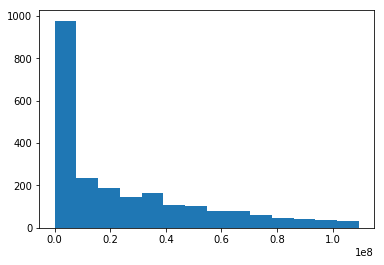

In [44]:
plt.hist(movies_short['Box Office Gross'], bins='auto')
plt.title('Box Office Gross Distribution')
plt.show()

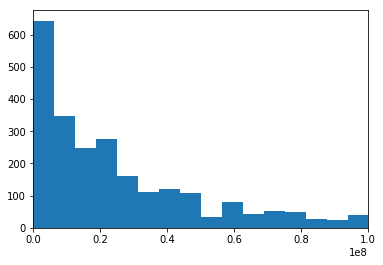

In [45]:
plt.hist(movies_short['Budget'], bins='auto')
plt.xlim(0, 100000000)
plt.title('Budget Distribution')
plt.show()

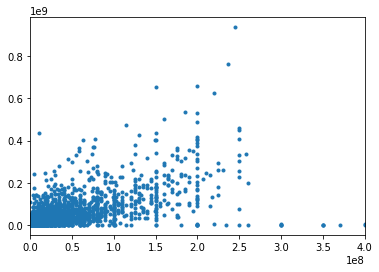

In [46]:
#Scatter Plot to examine relationship between budget and gross
plt.plot(movies_short['Budget'], movies_short['Box Office Gross'], linestyle='None', marker='.')
plt.xlim(0, 400000000)
plt.show()

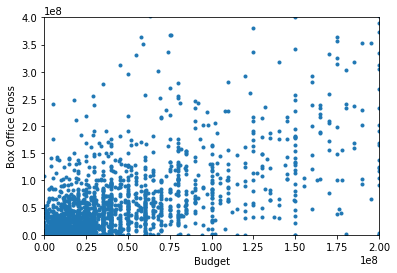

AttributeError: 'float' object has no attribute 'shape'

In [47]:
#Zoom In 
plt.plot(movies_short['Budget'], movies_short['Box Office Gross'], linestyle='None', marker='.')
plt.ylim(0, 400000000)
plt.xlim(0, 200000000)
plt.xlabel('Budget')
plt.ylabel('Box Office Gross')
plt.show()

np.corrcoef(movies_short['Budget'], movies_short['Box Office Gross'])

In [48]:
movies_splice = movies_short[['Budget', 'Box Office Gross']]


pearson = movies_splice['Budget'].astype(float).corr(movies_splice['Box Office Gross'].astype(float))


print(pearson)

0.400634309947


In [49]:
#As Expected, it looks like there is some relationship between budget and box office gross, but it hard to tell from points alone
#How prolific this relationship is. 

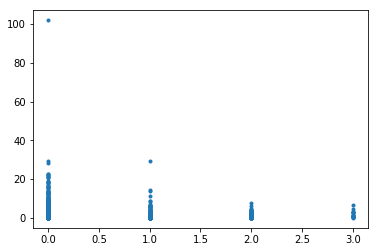

In [50]:
#Exploratory Plots

#Actor Score
plt.plot(movies_short['actor_score'], movies_short['Profitability Ratio'], linestyle='None', marker='.')
plt.show()

#The number of famous actors shrinks the range of profitabilities, which makes sense considering that movies with more famous actors 
#tend to have larger budgets.


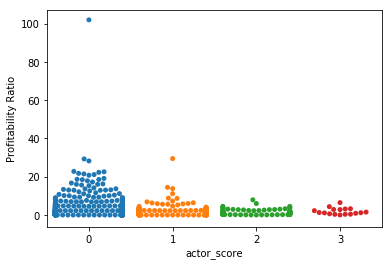

In [51]:
#Swarmplot of the same information to visualize, but needs further examination.
#WARNING: Takes a while to process and load!

sns.swarmplot(x=movies_short['actor_score'], y=movies_short['Profitability Ratio'])
plt.ylim((0, 15))
plt.show()

In [53]:
#Maybe for box plots or 4 vertical histograms

#USe kernels to modify histogram plotting

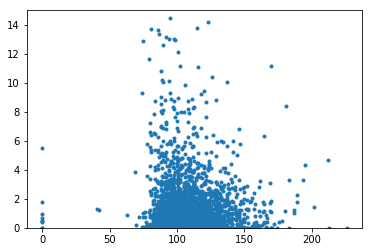

In [56]:
#Runtime 
###############################################

plt.plot(movies_short['runtime'], movies_short['Profitability Ratio'], linestyle='None', marker='.')
plt.ylim((0, 15))
plt.show()

In [57]:
#Based on initial analysis, it looks like the median movie is not profitable, but that there are some definite trends in the
#movies that tend to make it big. The variables to watch out for in the predictive model include actor and director score,
#runtime, and genre. 

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [59]:
type(movies_filled['Budget'])

pandas.core.series.Series

In [60]:
type(movies_filled.iloc[0, 9])

int

In [61]:
movies_filled.describe()

,imdb_rating,Profitability Ratio,actor_score,director_score,Action?,Adventure?,Animation?,Biography?,Comedy?,Drama?,...,Horror?,Mystery?,Romance?,Sci-Fi?,Thriller?,G?,PG?,PG-13?,R?,Not Rated?
count,2594.000000,2593.000000,2611.000000,2611.000000,2611.000000,2611.000000,2611.000000,2611.000000,2611.000000,2611.000000,...,2611.000000,2611.000000,2611.000000,2611.000000,2611.000000,2611.000000,2611.000000,2611.000000,2611.000000,2611.000000
mean,6.369429,1.582524,0.272309,0.113367,0.240138,0.185753,0.054385,0.067790,0.369207,0.504404,...,0.093834,0.081195,0.172348,0.070088,0.162773,0.018001,0.132133,0.340483,0.410571,0.098813
std,1.044074,3.249850,0.567102,0.596427,0.427249,0.388981,0.226820,0.251434,0.482683,0.500076,...,0.291653,0.273187,0.377755,0.255344,0.369229,0.132979,0.338700,0.473962,0.492032,0.298468
min,1.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.800000,0.195868,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.450000,0.809122,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.100000,1.807131,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,9.900000,102.000000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
movies_filled['Budget'].describe()

count         2611
unique         342
top       20000000
freq           109
Name: Budget, dtype: int64

In [63]:
movies_filled['Box Office Gross'].describe()

count         2611
unique        2611
top       47806295
freq             1
Name: Box Office Gross, dtype: int64

In [64]:
movies_filled['Box Office Gross'].isnull().sum()

0

In [65]:
movies_filled['Budget'].isnull().sum()

0

In [66]:
#Let's analyze different time blocks to see if they have any influence on revenue.

In [67]:
winter = movies_short[(movies_short['release_date'].dt.month >= 1) & (movies_short['release_date'].dt.month <= 3)]
spring = movies_short[(movies_short['release_date'].dt.month >= 4) & (movies_short['release_date'].dt.month <= 6)]
summer = movies_short[(movies_short['release_date'].dt.month >= 7) & (movies_short['release_date'].dt.month <= 9)]
fall = movies_short[(movies_short['release_date'].dt.month >= 10) & (movies_short['release_date'].dt.month <= 12)]

In [68]:
winter_med = np.median(winter['Box Office Gross'])
spring_med = np.median(spring['Box Office Gross'])
summer_med = np.median(summer['Box Office Gross'])
fall_med = np.median(fall['Box Office Gross'])

averages = [winter_med, spring_med, summer_med, fall_med]
x = ['Winter', 'Spring', 'Summer', 'Fall']

[19522939.0, 17384072.0, 18872522.0, 19985196.0]


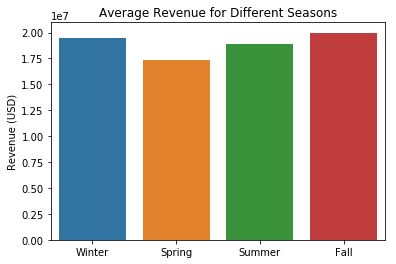

In [193]:
print(averages)
sns.barplot(x=x, y=averages)
plt.ylabel('Revenue (USD)')
plt.title('Average Revenue for Different Seasons')
plt.show()

#According to this, the median movie has the greatest revenue in the fall and least in the spring!

In [196]:
winter_med = np.nanmedian(winter[pd.notnull(winter)]['Profitability Ratio'])
spring_med = np.nanmedian(spring[pd.notnull(spring)]['Profitability Ratio'])
summer_med = np.nanmedian(summer[pd.notnull(summer)]['Profitability Ratio'])
fall_med = np.nanmedian(fall[pd.notnull(fall)]['Profitability Ratio'])

medians = [winter_med, spring_med, summer_med, fall_med]
x = ['Winter', 'Spring', 'Summer', 'Fall']


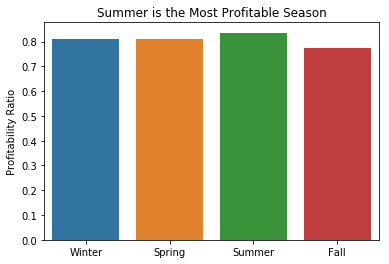

[0.8091221428571429, 0.81189596428571431, 0.83596948148148154, 0.77236336576923081]


In [197]:
sns.barplot(x=x, y=medians)
plt.ylabel('Profitability Ratio')
plt.title('Summer is the Most Profitable Season')
plt.show()
print(medians)

#Interestingly, even though revenue is up in the fall, profitability actually peaks in the summer.

In [198]:
#Runtime Analysis 

#Only taking out profitable movies, then plotting the general distribution of profitable movies across runtimes.
profitable_movies = movies_short[movies_short['Profitability Ratio'] >= 1]
#profitable_movies.head()

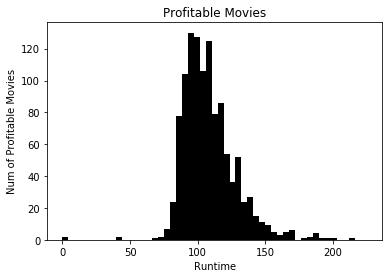

In [186]:
plt.hist(profitable_movies['runtime'], bins='auto', range =(0, 225), color='k')
plt.xlabel('Runtime')
plt.ylabel('Num of Profitable Movies')
plt.title('Profitable Movies')
plt.show()



#It looks like movies around 100 min. long, with a slight bias towards the shorter, tend to fare the best. Let's compare to 
#the original set. 

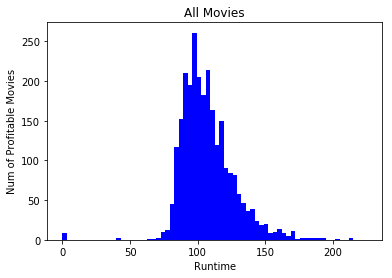

In [74]:
plt.hist(movies_short['runtime'], bins='auto', range = (0,225), color='b')
plt.xlabel('Runtime')
plt.ylabel('Num of Profitable Movies')
plt.title('All Movies')
plt.show()

#Right from the graph, it appears that the overall set of movies has a larger proportion of movies that run longer than 120 mins
#and a slight 

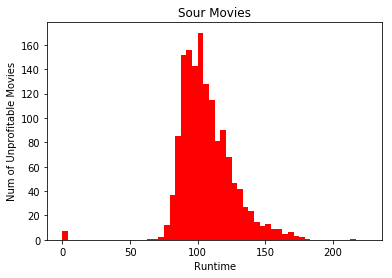

In [187]:
#Let's see the distribution for unprofitable movies. 

unprofitable_movies = movies_short[movies_short['Profitability Ratio'] <= 1]

plt.hist(unprofitable_movies['runtime'], bins='auto', range = (0,225), color='r')
plt.xlabel('Runtime')
plt.ylabel('Num of Unprofitable Movies')
plt.title('Sour Movies')
plt.show()

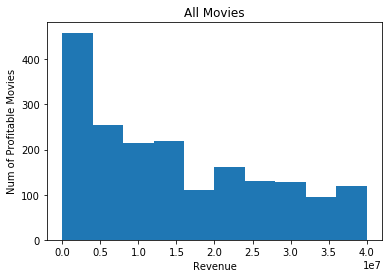

In [190]:
plt.hist(movies_short['Budget'], bins=10, range = (0, 40000000))
plt.xlabel('Revenue')
plt.ylabel('Num of Profitable Movies')
plt.title('All Movies')
plt.show()

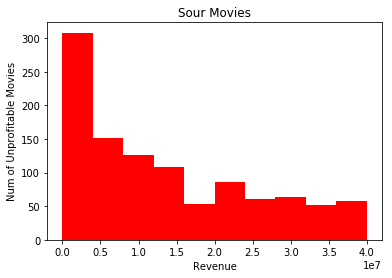

In [191]:
plt.hist(unprofitable_movies['Budget'], bins=10, range = (0, 40000000), color='r')
plt.xlabel('Revenue')
plt.ylabel('Num of Unprofitable Movies')
plt.title('Sour Movies')
plt.show()

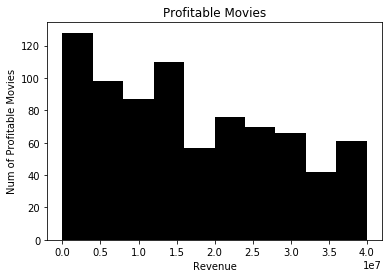

In [192]:
plt.hist(profitable_movies['Budget'], bins=10, range = (0, 40000000), color='k')
plt.xlabel('Revenue')
plt.ylabel('Num of Profitable Movies')
plt.title('Profitable Movies')
plt.show()

#Based on these plots alone, which can only be compared on a relative scale, it appears that the proportion of big budget movies
#in the profitable section is higher than that without. Further analysis may reveal whether big budget movies tend to outperform
#smaller ones.

In [76]:
#Comparing the proportion of movies above a benchmark time - say, 2 hours - for the different batches of movies.

long_prof_movies_count = profitable_movies[profitable_movies['runtime'] >= 120]['runtime'].count()
prof_movies_count = profitable_movies['runtime'].count()

long_movies_count = movies_short[movies_short['runtime'] >= 120]['runtime'].count()
movies_count = movies_short['runtime'].count()

long_unprof_movies_count = unprofitable_movies[unprofitable_movies['runtime'] >= 120]['runtime'].count()
unprof_movies_count = unprofitable_movies['runtime'].count()

print(long_prof_movies_count / prof_movies_count * 100)
print(long_movies_count / movies_count * 100)
print(long_unprof_movies_count / unprof_movies_count * 100)


#There's a noticeable, albeit slight trend here! Out of the total set of movies, only 19.9% of successful ones ran longer than 2
# hours, compared to 21.4% of unsuccessful ones. Nearly half of movies in general! Perhaps people are impatient and don't 
# want to lose a great deal of time on entertainment. #Perhaps going long is a slightly risky decision by producers. We'll have 
#to test if this difference is significant.


22.8116710875
21.7987804878
21.0382513661


0.809122142857
0.72688614
0.989852544828
1.11280369333
1.29664436


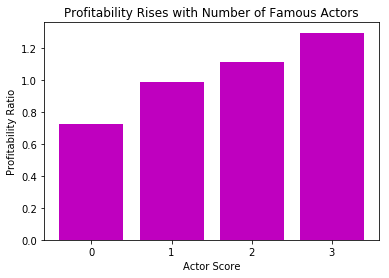

In [132]:
#comparing actor score 0 with actor score 1 
#Right off the bat it's apparent that going from an actor score of 0 to anything else is much better, with even one famous actor
#causing an expected return of nearly 100% of budget back

median_profitability = np.median(movies_short['Profitability Ratio'].dropna())
actor_0 = movies_short[movies_short['actor_score'] == 0]
actor_1 = movies_short[movies_short['actor_score'] == 1]
actor_2 = movies_short[movies_short['actor_score'] == 2]
actor_3 = movies_short[movies_short['actor_score'] == 3]

print(median_profitability)
print(np.median(actor_0['Profitability Ratio'].dropna()))
print(np.median(actor_1['Profitability Ratio'].dropna()))
print(np.median(actor_2['Profitability Ratio'].dropna()))
print(np.median(actor_3['Profitability Ratio'].dropna()))

medians = []
medians.append(np.median(actor_0['Profitability Ratio'].dropna()))
medians.append(np.median(actor_1['Profitability Ratio'].dropna()))
medians.append(np.median(actor_2['Profitability Ratio'].dropna()))
medians.append(np.median(actor_3['Profitability Ratio'].dropna()))

labels = ('0', '1', '2', '3')

y_pos = np.arange(len(labels))
plt.xticks(y_pos, labels)

plt.bar(y_pos, medians, color='m')
plt.xlabel('Actor Score')
plt.ylabel('Profitability Ratio')
plt.title('Profitability Rises with Number of Famous Actors')
plt.show()

In [148]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

In [159]:
empirical_diff_means = diff_of_means(actor_0['Profitability Ratio'], actor_1['Profitability Ratio'])

In [160]:
#type(actor_0.iloc[0, 10])
#type(np.median(actor_0))

In [163]:
#Time for T-test 

actors_shifted_0 = actor_0['Profitability Ratio'].dropna() - np.median(actor_0['Profitability Ratio'].dropna()) + median_profitability
actors_shifted_0 = actor_1['Profitability Ratio'].dropna() - np.median(actor_1['Profitability Ratio'].dropna()) + median_profitability

bs_replicates_0 = draw_bs_reps(actors_shifted_0, np.median, size=10000)
bs_replicates_1 = draw_bs_reps(actors_shifted_0, np.median, size=10000) 

bs_replicates = bs_replicates_0 - bs_replicates_1 
p = np.sum(bs_replicates > empirical_diff_means) / 10000
print('p-value =', p)

#P-value of 0.0135 suggests that even the difference between a single and no famous actors is signficant!

p-value = 0.0134


In [167]:
winter['Profitability Ratio']

title
Gnomeo & Juliet                                        2.776880
The Lovely Bones                                       0.674136
John Carter                                            0.292312
Youth in Revolt                                        0.848960
Daybreakers                                            1.505079
The Crazies                                            1.956179
The Mechanic                                           0.728037
Hail, Caesar!                                          1.367283
Extremely Loud & Incredibly Close                      0.796197
Season of the Witch                                    0.620681
Hall Pass                                              1.251687
The Croods                                             1.386433
Red Tails                                              0.859938
Silence                                                0.153895
A Thousand Words                                       0.460954
Escape from Planet Earth          

In [169]:
winter_med = np.nanmedian(winter[pd.notnull(winter)]['Profitability Ratio'])
summer_med = np.nanmedian(summer[pd.notnull(summer)]['Profitability Ratio'])


winter_shifted = winter['Profitability Ratio'] - winter_med + median_profitability
summer_shifted = summer['Profitability Ratio'] - summer_med + median_profitability

empirical_diff_means = diff_of_means(winter['Profitability Ratio'], summer['Profitability Ratio'])

bs_replicates_0 = draw_bs_reps(actors_shifted_0, np.median, size=10000)
bs_replicates_1 = draw_bs_reps(actors_shifted_0, np.median, size=10000) 

bs_replicates = bs_replicates_0 - bs_replicates_1 
p = np.sum(bs_replicates > empirical_diff_means) / 10000
print('p-value =', p)

#P-value of 0.1732 suggests that there may be a signficant difference between summer and winter movies, though there is a one
#in 6 chance this difference is only made up by chance.

p-value = 0.1732


In [ ]:
#TO DO LATER: 
#As an aside, for the predictive model that is released after the movie comes out, we can also analyze how Box Office Gross
#is affected by IMDB ratings. 
"""
tier_0 = movies_w_ratings[movies_w_ratings['imdb_rating'] < 1.0]

rating_1 = (movies_w_ratings['imdb_rating'] >= 1.0) & (movies_w_ratings['imdb_rating'] < 2.0)
tier_1 = movies_w_ratings[rating_1]

rating_2 = (movies_w_ratings['imdb_rating'] >= 2.0) & (movies_w_ratings['imdb_rating'] < 3.0)
tier_2 = movies_w_ratings[rating_2]

rating_3 = (movies_w_ratings['imdb_rating'] >= 3.0) & (movies_w_ratings['imdb_rating'] < 4.0)
tier_3 = movies_w_ratings[rating_3]

rating_4 = (movies_w_ratings['imdb_rating'] >= 4.0) & (movies_w_ratings['imdb_rating'] < 5.0)
tier_4 = movies_w_ratings[rating_4]

rating_5 = (movies_w_ratings['imdb_rating'] >= 5.0) & (movies_w_ratings['imdb_rating'] < 6.0)
tier_5 = movies_w_ratings[rating_5]

rating_6 = (movies_w_ratings['imdb_rating'] >= 6.0) & (movies_w_ratings['imdb_rating'] < 7.0)
tier_6 = movies_w_ratings[rating_6]

rating_7 = (movies_w_ratings['imdb_rating'] >= 7.0) & (movies_w_ratings['imdb_rating'] < 8.0)
tier_7 = movies_w_ratings[rating_7]

rating_8 = (movies_w_ratings['imdb_rating'] >= 8.0) & (movies_w_ratings['imdb_rating'] < 9.0)
tier_8 = movies_w_ratings[rating_8]

rating_9 = (movies_w_ratings['imdb_rating'] >= 9.0) & (movies_w_ratings['imdb_rating'] < 10.0)
tier_9 = movies_w_ratings[rating_9]
"""
